In [9]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
time_series = pd.read_csv("../data/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


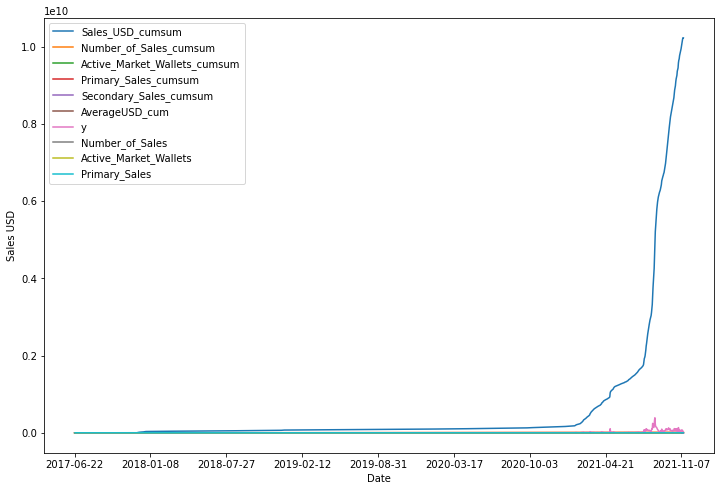

In [11]:
ax = time_series.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

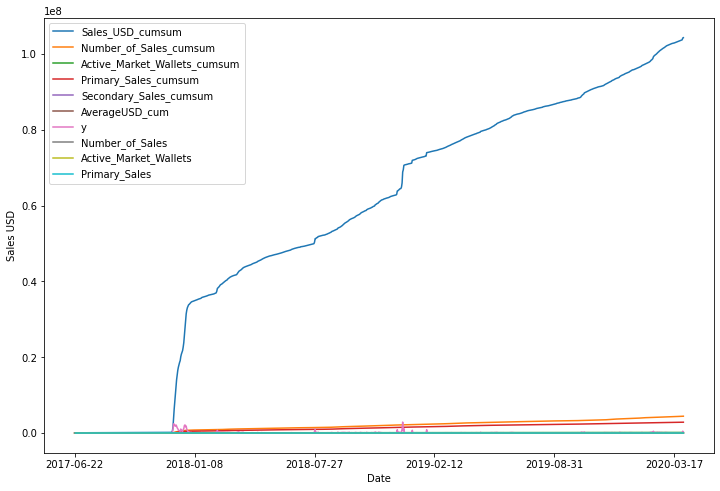

In [12]:
pre_covid = time_series.iloc[:1016,:]
post_covid = time_series.iloc[1016:,:]

pre_covid_clean = pre_covid[['ds', 'y']]

ax = pre_covid.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

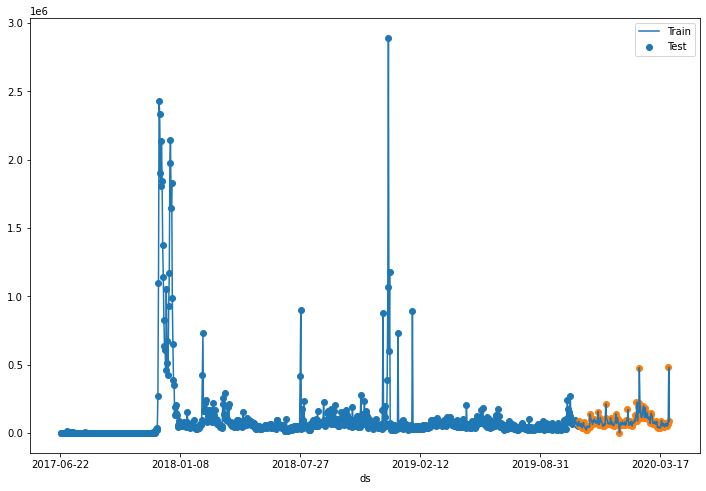

In [16]:
attrs = pre_covid.ds
labels = pre_covid.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.15, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = pre_covid_clean.set_index('ds').plot(figsize=(12, 8))
plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

In [17]:
model = Prophet(interval_width=0.95)
model.fit(train_data)

future = model.make_future_dataframe(periods=3, freq='MS')

forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Zoe Greenwald\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
861,2019-10-31,90444.521791,-326716.472471,515677.165677
862,2019-11-01,114463.899442,-288940.036901,556371.093758
863,2019-12-01,369974.446116,-25708.355464,785138.961301
864,2020-01-01,329498.251578,-81929.465305,717639.655200
865,2020-02-01,122665.517335,-257626.767965,509391.285601


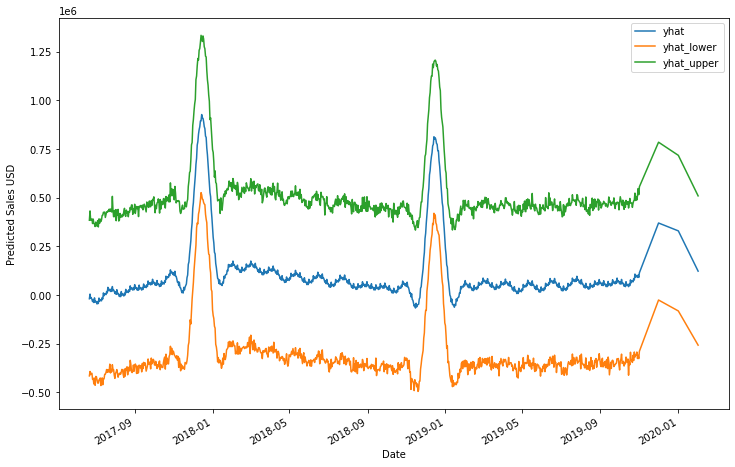

In [18]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

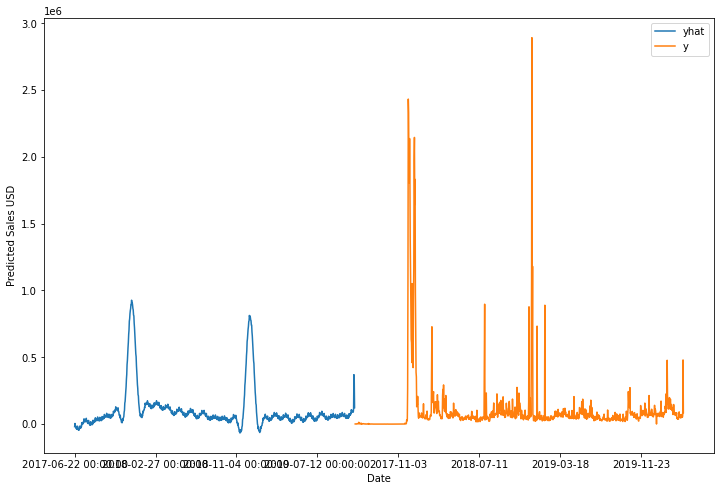

In [20]:
forecast = forecast[['ds', 'yhat']]
dfs = [forecast, pre_covid_clean]
compare = pd.concat(dfs)

ax = compare.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()